In [1]:
import sys

sys.path.append("../")
from library.datasets import ProstateCancerDataset
from library.train import create_dataloader
from entrypoint import prostate_scoring_function
import matplotlib.pyplot as plt
import torch
from library.models import *
import random

In [2]:
prostate_dir = "../datasets/train_prostate/train/"
random_seed = 24042

In [3]:
val_dataset = ProstateCancerDataset(
    prostate_dir,
    split_type="val",
    random_seed=random_seed,
    input_slice_count=3,
)

Adding raw case data to ChaimeleonDataset:   0%|          | 0/294 [00:00<?, ?it/s]

In [4]:
val_loader = create_dataloader(val_dataset, batch_size=3, shuffle=False)

In [5]:
test_dataset = ProstateCancerDataset(
    prostate_dir, split_type="test", random_seed=random_seed, input_slice_count=3
)

Adding raw case data to ChaimeleonDataset:   0%|          | 0/294 [00:00<?, ?it/s]

In [6]:
test_loader = create_dataloader(test_dataset, batch_size=3, shuffle=False)

In [7]:
# fig, ax = plt.subplots(figsize = (21,14), nrows=2, ncols=3)

# ind = 0
# (val_image, _,_,_) = val_dataset[ind]
# (test_image, _,_,_) = test_dataset[ind]
# for k in range(3):
#     ax[0,k].imshow(val_image[k,:,:].numpy().squeeze())
#     ax[1,k].imshow(test_image[k,:,:].numpy().squeeze())

In [8]:
bad_model_acc = (
    "tuning_exp_training_details/combined_model_raw_metadata/ProstateCombinedModelV1_1Tiny/2023-11-28T02-12-53/"
    "3_input_slices/0.01_starting_learning_rate/best_val_acc_ProstateCombinedModelV1_1Tiny.pt"
)
bad_model_score = (
    "tuning_exp_training_details/combined_model_raw_metadata/ProstateCombinedModelV1_1Tiny/2023-11-28T02-12-53/"
    "3_input_slices/0.01_starting_learning_rate/best_val_score_ProstateCombinedModelV1_1Tiny.pt"
)
better_model_acc = (
    "tuning_exp_training_details/pretrained_model_raw_metadata/ProstateCombinedResnet18PretrainedModel/2023-11-27T22-30-46/"
    "['layer1', 'layer2', 'layer3', 'layer4']_frozen/0.01_starting_learning_rate/best_val_acc_ProstateCombinedResnet18PretrainedModel.pt"
)
better_model_score = (
    "tuning_exp_training_details/pretrained_model_raw_metadata/ProstateCombinedResnet18PretrainedModel/2023-11-27T22-30-46/"
    "['layer1', 'layer2', 'layer3', 'layer4']_frozen/0.01_starting_learning_rate/best_val_score_ProstateCombinedResnet18PretrainedModel.pt"
)
best_model_score = (
    "tuning_exp_training_details/pretrained_model_raw_metadata/ProstateCombinedResnet18PretrainedModel/2023-11-27T22-30-46/"
    "[]_frozen/0.01_starting_learning_rate/best_val_score_ProstateCombinedResnet18PretrainedModel.pt"
)

shapes torch.Size([3, 3, 256, 256]) torch.Size([3, 2, 1]) tensor([[[68.0000],
         [ 6.3800]],

        [[52.0000],
         [10.7400]],

        [[57.0000],
         [12.0100]]])
3_input_slices_0.01_starting_learning_rate_best_val_score_ProstateCombinedModelV1_1Tiny.pt_results: 
	 val_results: 
		[[3.4830310344696045, 1.7221605777740479], [3.45735239982605, 1.7514147758483887], [3.435149908065796, 1.775062084197998]] - 
		[[0], [0], [0]] 
	 val_img_test_meta_results: 
		[[3.4830310344696045, 1.7221605777740479], [3.463716983795166, 1.7440522909164429], [3.4630818367004395, 1.7435050010681152]] - 
		[[0], [0], [0]]
test_results: 
		[[3.5717720985412598, 1.7823885679244995], [3.6899874210357666, 1.789724349975586], [3.6573970317840576, 1.8021271228790283]] - 
		[[0], [0], [0]]
test_img_val_meta: 
		[[3.5717720985412598, 1.7823885679244995], [3.6836230754852295, 1.7970867156982422], [3.646514892578125, 1.8019927740097046]] - 
		[[0], [0], [0]]

['layer1', 'layer2', 'layer3', 'layer4'

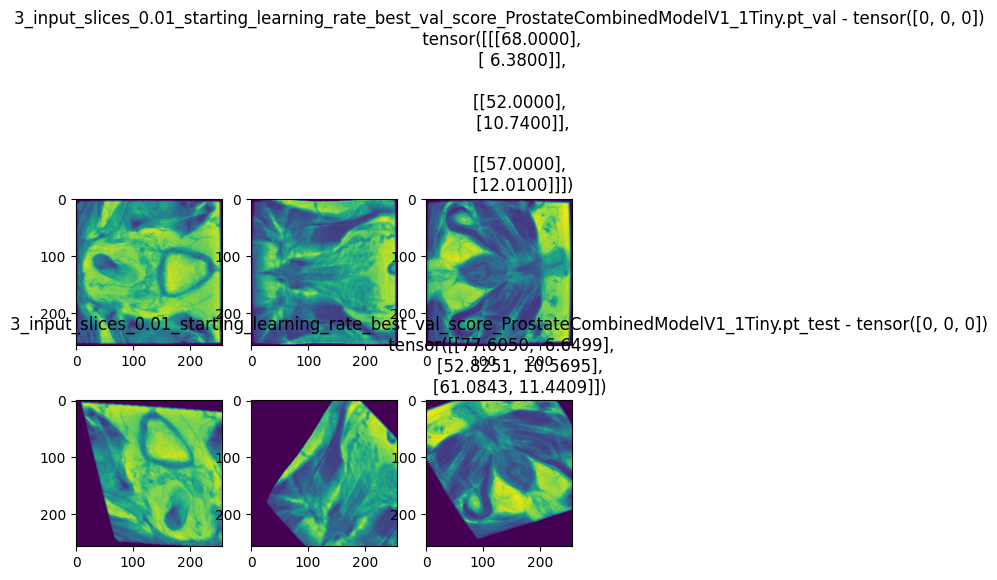

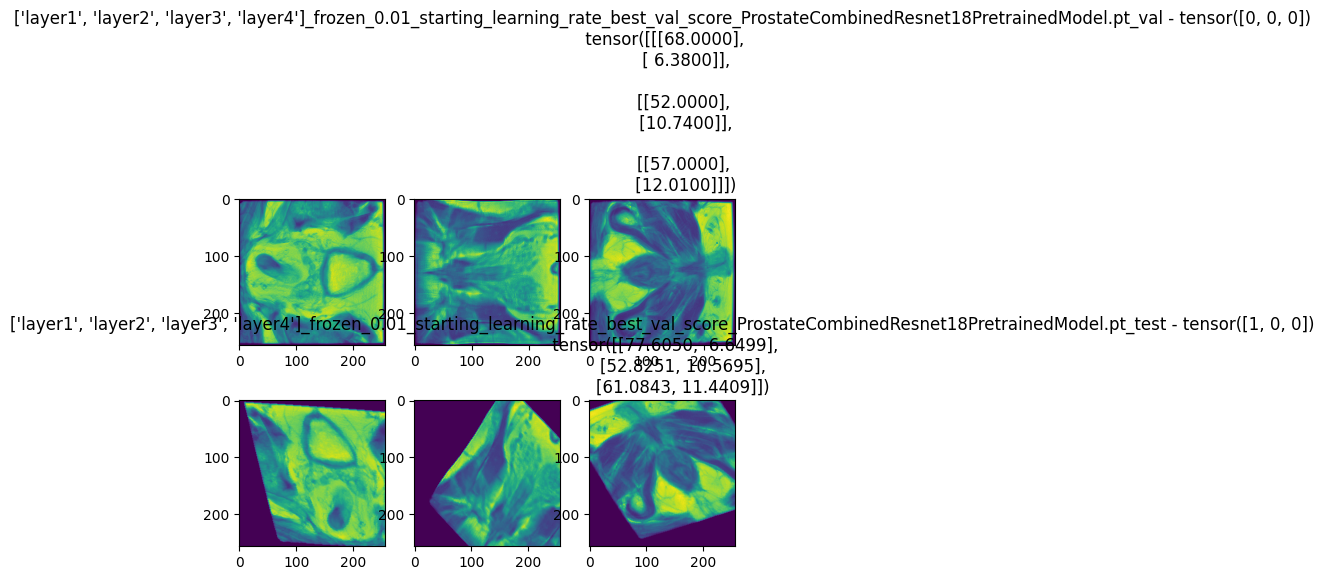

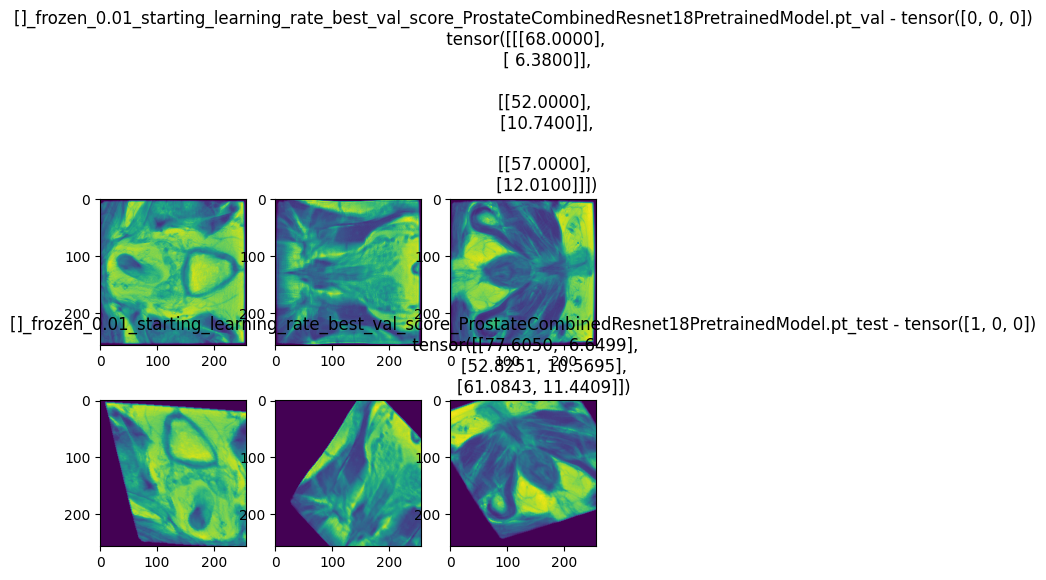

In [10]:
model_list = [
    # bad_model_acc,
    bad_model_score,
    # better_model_acc,
    better_model_score,
    best_model_score,
]

### test metadata augmetation

model_path_to_model = {
    "ProstateCombinedResnet18PretrainedModel.pt": ProstateCombinedResnet18PretrainedModel(),
    "1Tiny.pt": ProstateCombinedModelV1_1Tiny(input_slice_count=3),
}

ind = 1
# random.seed(random_seed)

for batch_ind, (val_images, val_metadata, val_targets) in enumerate(val_loader):
    val_data = (val_images, val_metadata.squeeze())
    # if "case_0279" in case[0]:
    #     break

for batch_ind, (test_images, test_metadata, test_targets) in enumerate(test_loader):
    test_metadata = test_metadata.squeeze()
    test_data = (test_images, test_metadata)
    # for k in range(val_images.shape[0]):
    # scale_factor = random.choice([0.85, 1.15])
    # test_metadata[k, 0] *= scale_factor
    # test_metadata[k, 1] *= scale_factor
    # test_data = (test_images, test_metadata)
    # if "case_0279" in case[0]:
    #     break

print("shapes", val_images.shape, val_metadata.shape, val_metadata)
for model_path in model_list:
    model = model_path_to_model[model_path.split("_")[-1]]
    model_state_dict = torch.load(f"../{model_path}")
    model.load_state_dict(model_state_dict)
    model.eval()
    val_results = model(val_data)
    val_img_test_meta = model((val_data[0], test_data[1]))
    test_results = model(test_data)
    test_img_val_meta = model((test_data[0], val_data[1]))
    model_name = "_".join(model_path.split("/")[-3:])
    print(
        f"{model_name}_results: \n\t val_results: \n\t\t{val_results.detach().numpy().tolist()} - \n\t\t{val_results.argmax(dim=1, keepdim=True).detach().numpy().tolist()} \n\t "
        f"val_img_test_meta_results: \n\t\t{val_img_test_meta.detach().numpy().tolist()} - \n\t\t{val_img_test_meta.argmax(dim=1, keepdim=True).detach().numpy().tolist()}\n"
        f"test_results: \n\t\t{test_results.detach().numpy().tolist()} - \n\t\t{test_results.argmax(dim=1, keepdim=True).detach().numpy().tolist()}\n"
        f"test_img_val_meta: \n\t\t{test_img_val_meta.detach().numpy().tolist()} - \n\t\t{test_img_val_meta.argmax(dim=1, keepdim=True).detach().numpy().tolist()}\n"
    )
    fig, ax = plt.subplots(nrows=2, ncols=val_images.shape[0])
    for k in range(val_images.shape[0]):
        img = val_images[k, 0, :, :].numpy()
        ax[0, k].imshow(img)
    ax[0, k].set_title(
        f"{model_name}_val - {val_results.argmax(dim=1)}\n {val_metadata}"
    )
    for k in range(test_images.shape[0]):
        img = test_images[k, 0, :, :].numpy()
        ax[1, k].imshow(img)
    ax[1, k].set_title(
        f"{model_name}_test - {test_results.argmax(dim=1)}\n {test_metadata}"
    )
print(val_targets.argmax(dim=1, keepdim=True))

In [ ]:
case

In [ ]:
t["image"].shape